In [58]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [59]:
df_GS = pd.read_csv('../data/clean/analysis_GS.csv')
df_JPM = pd.read_csv('../data/clean/analysis_JPM.csv')
df_MSFT = pd.read_csv('../data/clean/analysis_microsoft.csv')
df_NV = pd.read_csv('../data/clean/analysis_nvidia.csv')

In [60]:
def set_index(df, company_name):
    df['stat'] = ['mean', 'std']
    df['company'] = company_name
    df.set_index(['company', 'stat'], inplace = True)
    return df

In [61]:
set_index(df_GS, 'Goldman Sachs')
set_index(df_JPM, 'JPMorgan')
set_index(df_MSFT, 'Microsoft')
set_index(df_NV, 'NVIDIA')

df = pd.concat([df_GS, df_JPM, df_MSFT, df_NV], axis = 0)
df.sort_index(level = ['company', 'stat'])
df

open     high      low    close  adj_close  \
company       stat                                                  
Goldman Sachs mean  313.142  316.708  309.682  313.268    303.723   
              std    69.930   70.269   69.549   69.921     71.589   
JPMorgan      mean  137.202  138.594  135.828  137.232    131.592   
              std    24.936   24.880   25.052   25.005     26.046   
Microsoft     mean  285.416  288.223  282.464  285.468    280.601   
              std    80.300   80.510   79.794   80.170     81.986   
NVIDIA        mean   34.247   34.892   33.551   34.254     34.230   
              std    34.045   34.665   33.307   34.008     34.015   

                          volume  daily_returns  monthly_returns  \
company       stat                                                 
Goldman Sachs mean  2.766379e+06          0.090            0.878   
              std   1.392000e+06          2.102            8.656   
JPMorgan      mean  1.363898e+07          0.068            0.878   
              std   7.174140e+06          2.074            8.656   
Microsoft     mean  2.859568e+07          0.105            2.202   
              std   1.272353e+07          1.911            6.170   
NVIDIA        mean  4.506006e+08          0.322            7.877   
              std   1.858579e+08          3.382           14.444   

                    annual_returns  daily_range  
company       stat                               
Goldman Sachs mean           9.826        7.026  
              std           16.607        3.217  
JPMorgan      mean           9.826        2.766  
              std           16.607        1.366  
Microsoft     mean          47.123        5.760  
              std            4.961        2.914  
NVIDIA        mean         123.766        1.341  
              std            1.590        1.641

In [62]:
def plot(df, column):
    means = df.xs('mean', level='stat')[column]
    stds = df.xs('std', level='stat')[column]
    
    x = np.arange(len(means))
    
    plt.figure(figsize=(7, 4))
    plt.bar(x, means, yerr=stds, capsize=5, alpha=0.7, color='skyblue')
    plt.xticks(x, means.index, rotation=45)
    plt.ylabel(column)
    plt.title(f"{column.capitalize()} by Company")
    plt.show()

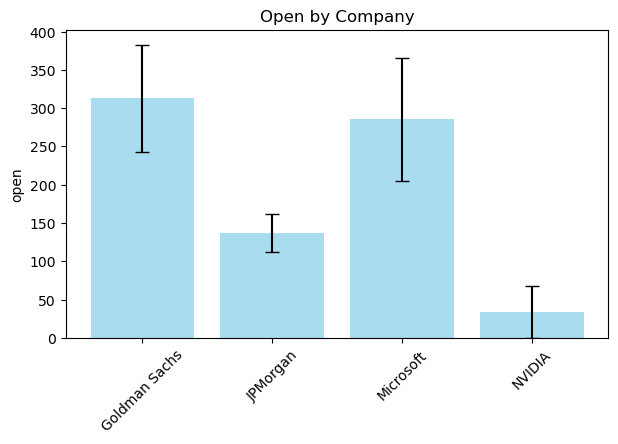

In [63]:
plot(df, 'open')

**Open price**: The open price chart for companies can provide insights into the opening sentiment (general expectations or optimism/pessimism of investors) of the market towards the stock. If the open price is consistently higher or lower than the previous day's close price, it may indicate bullish (rising prices) or bearish (falling prices --> more sells) sentiment, respectively.

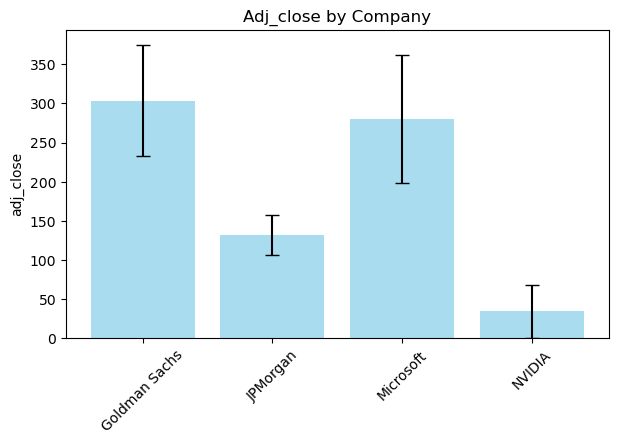

In [65]:
plot(df, 'adj_close')

**Adjacent close**: The adjacent close value differs from the close value because it is adjusted to reflect the effects of corporate actions (dividends, stock splits, or similar). Adjacent close provides a more accurate measure of a stock’s value over time, allowing you to analyze its actual performance without distortions from corporate actions.

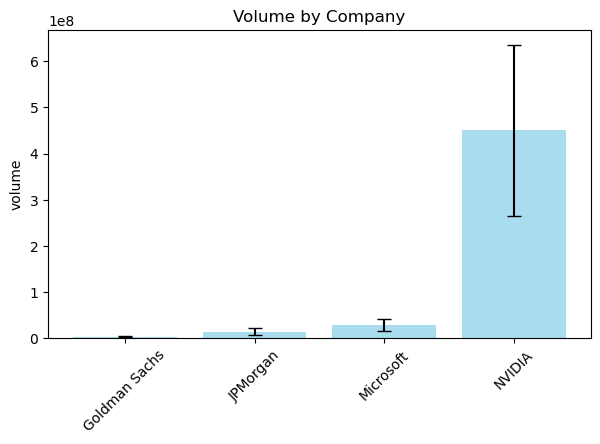

In [66]:
plot(df, 'volume')

**Volume traded**: The volume traded chart for both companies can provide insights into the level of interest and activity surrounding the stock. Higher volume traded can indicate higher interest and activity, while lower volume traded can indicate lower interest and activity.

Low stock prices for NVIDIA --> high trade volumes

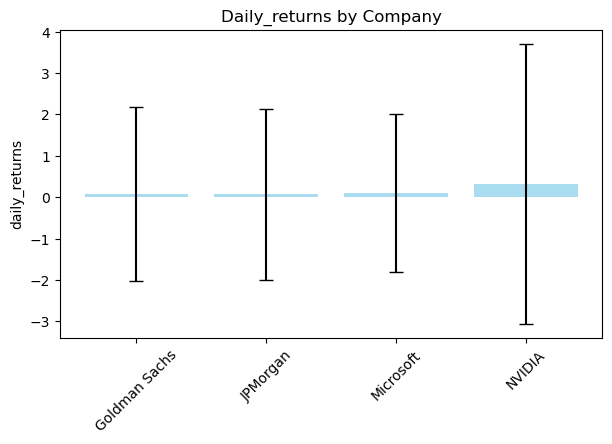

In [67]:
plot(df, 'daily_returns')

**Daily returns** indicate how much the stock's price has risen or fallen compared to the open price. They provide insights into the stock’s short-term volatility and daily price fluctuations.